In [2]:
#교통사고
import pandas as pd
ac = pd.read_csv('acci.csv', engine='python')
ac.head()

,도로종류,시간대,사고건수,사망자수,부상자수,중상,경상,부상신고
0,일반국도,00시-02시,878,87,1428,481,894,53
1,일반국도,02시-04시,535,51,820,273,502,45
2,일반국도,04시-06시,554,67,876,355,479,42
3,일반국도,06시-08시,1262,85,2180,727,1374,79
4,일반국도,08시-10시,1757,71,3175,993,2062,120


In [3]:
ac.tail()

,도로종류,시간대,사고건수,사망자수,부상자수,중상,경상,부상신고
79,기타,14시-16시,1943,42,2426,735,1520,171
80,기타,16시-18시,2242,56,2820,876,1766,178
81,기타,18시-20시,2228,50,2746,768,1779,199
82,기타,20시-22시,1610,22,1964,529,1287,148
83,기타,22시-24시,1256,10,1577,437,1031,109


(array([0., 2., 0., 3., 1., 2., 1., 4., 4.]),
 array([ 0.        ,  2.66666667,  5.33333333,  8.        , 10.66666667,
        13.33333333, 16.        , 18.66666667, 21.33333333, 24.        ]),
 <a list of 9 Patch objects>)

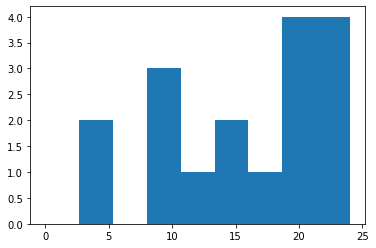

In [56]:
ac2 = ac.사망자수
import matplotlib.pyplot as plt
import numpy as np
plt.hist(ac2,bins=np.linspace(0,24,10))

In [52]:
acd = ac.사망자수
aca = ac.부상자수
(acd/aca)*100

0     6.092437
1     6.219512
2     7.648402
3     3.899083
4     2.236220
        ...   
79    1.731245
80    1.985816
81    1.820830
82    1.120163
83    0.634115
Length: 84, dtype: float64

In [53]:
dp=(acd/aca)*100
np.mean(dp)

2.680960444490834

In [43]:
import pandas as pd
import numpy as np
data = pd.DataFrame(dp ,columns=['사망확률(%)'])
data

,사망확률(%)
0,6.092437
1,6.219512
2,7.648402
3,3.899083
4,2.236220
...,...
79,1.731245
80,1.985816
81,1.820830
82,1.120163


In [48]:
ac['사망확률(%)'] = dp
ac

,도로종류,시간대,사고건수,사망자수,부상자수,중상,경상,부상신고,사망확률(%)
0,일반국도,00시-02시,0.077173,87,1428,481,894,53,6.092437
1,일반국도,02시-04시,0.043367,51,820,273,502,45,6.219512
2,일반국도,04시-06시,0.045240,67,876,355,479,42,7.648402
3,일반국도,06시-08시,0.115021,85,2180,727,1374,79,3.899083
4,일반국도,08시-10시,0.163808,71,3175,993,2062,120,2.236220
...,...,...,...,...,...,...,...,...,...
79,기타,14시-16시,0.182141,42,2426,735,1520,171,1.731245
80,기타,16시-18시,0.211610,56,2820,876,1766,178,1.985816
81,기타,18시-20시,0.210231,50,2746,768,1779,199,1.820830
82,기타,20시-22시,0.149320,22,1964,529,1287,148,1.120163


In [21]:
ac['사고건수']=(ac['사고건수']-ac['사고건수'].min())/(ac['사고건수'].max()-ac['사고건수'].min())
ac

,도로종류,시간대,사고건수,사망자수,부상자수,중상,경상,부상신고
0,일반국도,00시-02시,0.077173,87,1428,481,894,53
1,일반국도,02시-04시,0.043367,51,820,273,502,45
2,일반국도,04시-06시,0.045240,67,876,355,479,42
3,일반국도,06시-08시,0.115021,85,2180,727,1374,79
4,일반국도,08시-10시,0.163808,71,3175,993,2062,120
...,...,...,...,...,...,...,...,...
79,기타,14시-16시,0.182141,42,2426,735,1520,171
80,기타,16시-18시,0.211610,56,2820,876,1766,178
81,기타,18시-20시,0.210231,50,2746,768,1779,199
82,기타,20시-22시,0.149320,22,1964,529,1287,148


In [55]:
from sklearn import datasets
ac = datasets.ac()
X = ac.data
y = ac.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5)

from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(y_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))

AttributeError: module 'sklearn.datasets' has no attribute 'ac'